In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [364]:
df = pd.read_csv(r"/content/goibibo_flights_data.csv")

In [365]:
df.head()

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops,Unnamed: 11,Unnamed: 12
0,26-06-2023,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,02h 10m,"6,013",non-stop,NaN,NaN
1,26-06-2023,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,02h 20m,"6,013",non-stop,NaN,NaN
2,26-06-2023,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,02h 10m,"6,016",non-stop,NaN,NaN
3,26-06-2023,Vistara,UK-995,economy,Delhi,10:20,Mumbai,12:35,02h 15m,"6,015",non-stop,NaN,NaN
4,26-06-2023,Vistara,UK-963,economy,Delhi,08:50,Mumbai,11:10,02h 20m,"6,015",non-stop,NaN,NaN


In [366]:
len(df.columns)

13

In [367]:
df = df.drop(["Unnamed: 11","Unnamed: 12"],axis=1)

In [368]:
len(df.columns)

11

In [369]:
df.columns

Index(['flight date', 'airline', 'flight_num', 'class', 'from', 'dep_time',
       'to', 'arr_time', 'duration', 'price', 'stops'],
      dtype='object')

In [370]:
df.isnull().sum()

,0
flight date,0
airline,0
flight_num,0
class,0
from,0
dep_time,0
to,0
arr_time,0
duration,0
price,0


### No null values in the database


In [371]:
df.head()

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops
0,26-06-2023,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,02h 10m,"6,013",non-stop
1,26-06-2023,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,02h 20m,"6,013",non-stop
2,26-06-2023,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,02h 10m,"6,016",non-stop
3,26-06-2023,Vistara,UK-995,economy,Delhi,10:20,Mumbai,12:35,02h 15m,"6,015",non-stop
4,26-06-2023,Vistara,UK-963,economy,Delhi,08:50,Mumbai,11:10,02h 20m,"6,015",non-stop


In [372]:
df["airline"].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO FIRST', 'Indigo',
       'Air India', 'Trujet', 'StarAir'], dtype=object)

In [373]:
df.head()

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops
0,26-06-2023,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,02h 10m,"6,013",non-stop
1,26-06-2023,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,02h 20m,"6,013",non-stop
2,26-06-2023,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,02h 10m,"6,016",non-stop
3,26-06-2023,Vistara,UK-995,economy,Delhi,10:20,Mumbai,12:35,02h 15m,"6,015",non-stop
4,26-06-2023,Vistara,UK-963,economy,Delhi,08:50,Mumbai,11:10,02h 20m,"6,015",non-stop


In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   flight date  300261 non-null  object
 1   airline      300261 non-null  object
 2   flight_num   300261 non-null  object
 3   class        300261 non-null  object
 4   from         300261 non-null  object
 5   dep_time     300261 non-null  object
 6   to           300261 non-null  object
 7   arr_time     300261 non-null  object
 8   duration     300261 non-null  object
 9   price        300261 non-null  object
 10  stops        300261 non-null  object
dtypes: object(11)
memory usage: 25.2+ MB


In [375]:
df["flight date"]= pd.to_datetime(df["flight date"])

<ipython-input-375-3101699b4810>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["flight date"]= pd.to_datetime(df["flight date"])


In [376]:
df["Year"] = df["flight date"].dt.year

In [377]:
df["Month"] = df["flight date"].dt.month
df["Day"] = df["flight date"].dt.day

In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   flight date  300261 non-null  datetime64[ns]
 1   airline      300261 non-null  object        
 2   flight_num   300261 non-null  object        
 3   class        300261 non-null  object        
 4   from         300261 non-null  object        
 5   dep_time     300261 non-null  object        
 6   to           300261 non-null  object        
 7   arr_time     300261 non-null  object        
 8   duration     300261 non-null  object        
 9   price        300261 non-null  object        
 10  stops        300261 non-null  object        
 11  Year         300261 non-null  int32         
 12  Month        300261 non-null  int32         
 13  Day          300261 non-null  int32         
dtypes: datetime64[ns](1), int32(3), object(10)
memory usage: 28.6+ MB


In [379]:
df = df.drop("flight date",axis=1)

In [380]:
df['price'] = df['price'].str.replace(',',"").astype('int')


In [381]:
df.head()

,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops,Year,Month,Day
0,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,02h 10m,6013,non-stop,2023,6,26
1,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,02h 20m,6013,non-stop,2023,6,26
2,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,02h 10m,6016,non-stop,2023,6,26
3,Vistara,UK-995,economy,Delhi,10:20,Mumbai,12:35,02h 15m,6015,non-stop,2023,6,26
4,Vistara,UK-963,economy,Delhi,08:50,Mumbai,11:10,02h 20m,6015,non-stop,2023,6,26


In [382]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   airline     300261 non-null  object
 1   flight_num  300261 non-null  object
 2   class       300261 non-null  object
 3   from        300261 non-null  object
 4   dep_time    300261 non-null  object
 5   to          300261 non-null  object
 6   arr_time    300261 non-null  object
 7   duration    300261 non-null  object
 8   price       300261 non-null  int64 
 9   stops       300261 non-null  object
 10  Year        300261 non-null  int32 
 11  Month       300261 non-null  int32 
 12  Day         300261 non-null  int32 
dtypes: int32(3), int64(1), object(9)
memory usage: 26.3+ MB


In [383]:
# count the number of Non stop flights and return the flight num which are non stop

non_stop_flights = df[df['stops'] == 'non-stop']

non_stop_count = non_stop_flights.shape[0]

non_stop_flight_numbers = non_stop_flights["flight_num"].tolist()

# print(non_stop_flights)
print(non_stop_count)
print(non_stop_flight_numbers)

36044
['SG-8709', 'SG-8157', 'I5-764', 'UK-995', 'UK-963', 'UK-945', 'UK-927', 'UK-951', 'G8-334', 'G8-336', 'G8-392', 'G8-338', '6E-5001', '6E-6202', '6E-549', '6E-6278', 'AI-887', 'AI-665', '6E-5328', 'UK-933', '6E-2046', 'SG-8169', '6E-5041', 'UK-955', 'UK-977', 'SG-8803', 'SG-8169', 'UK-927', 'UK-985', 'UK-977', 'UK-963', 'UK-955', 'UK-953', 'G8-334', 'G8-336', 'G8-346', 'G8-330', 'G8-338', 'G8-323', '6E-5001', '6E-2046', '6E-5041', '6E-218', '6E-549', '6E-6722', 'SG-8157', '6E-6278', '6E-5328', 'I5-764', 'AI-868', 'AI-887', 'AI-665', 'AI-805', 'AI-624', 'UK-995', 'UK-951', 'UK-933', 'UK-945', '6E-6202', 'SG-8803', 'SG-8157', 'SG-8169', 'UK-927', 'UK-995', 'UK-963', 'G8-334', 'G8-346', 'G8-338', 'G8-323', '6E-5001', '6E-218', '6E-6278', '6E-5328', 'I5-764', 'AI-887', 'AI-665', 'AI-805', 'AI-624', 'UK-985', 'SG-8709', 'UK-977', 'G8-336', 'G8-330', 'UK-945', 'AI-868', 'G8-392', '6E-6202', '6E-5041', '6E-2046', '6E-549', 'UK-933', 'UK-951', 'UK-953', 'UK-955', '6E-6722', 'SG-8709', 'S

In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   airline     300261 non-null  object
 1   flight_num  300261 non-null  object
 2   class       300261 non-null  object
 3   from        300261 non-null  object
 4   dep_time    300261 non-null  object
 5   to          300261 non-null  object
 6   arr_time    300261 non-null  object
 7   duration    300261 non-null  object
 8   price       300261 non-null  int64 
 9   stops       300261 non-null  object
 10  Year        300261 non-null  int32 
 11  Month       300261 non-null  int32 
 12  Day         300261 non-null  int32 
dtypes: int32(3), int64(1), object(9)
memory usage: 26.3+ MB


<Axes: xlabel='airline', ylabel='price'>

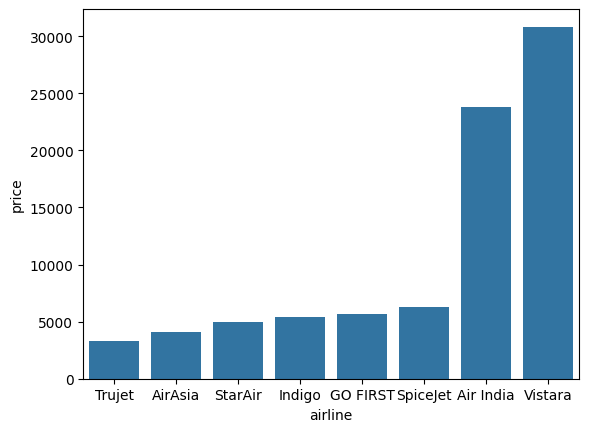

In [385]:
# cheapest to expensive flights

df2 = df.groupby("airline").agg({"price":"mean"}).reset_index().sort_values(by='price')

sns.barplot(x='airline',y='price',data=df2)

<Axes: xlabel='Month', ylabel='price'>

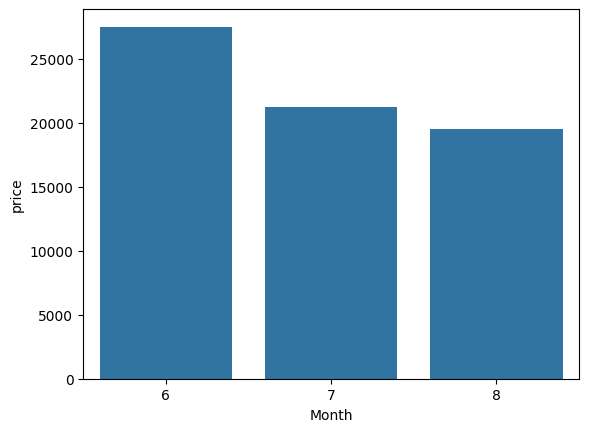

In [386]:
# Cheapest to expensive flights by Month

df2 = df.groupby(["Month"]).agg({'price':"mean"}).reset_index().sort_values(by='price')

sns.barplot(x='Month',y='price',data=df2)

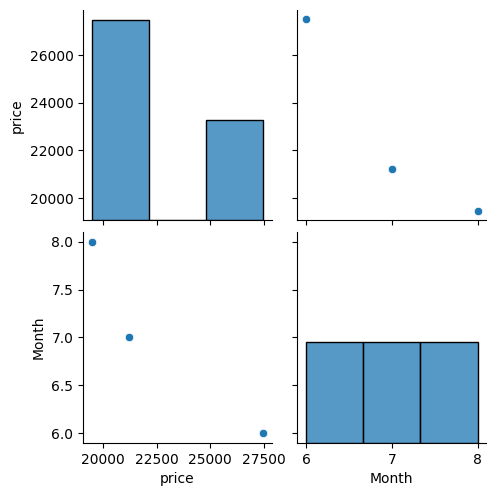

In [387]:
sns.pairplot(df2[['price','Month']])

## price affect with classes

<Axes: xlabel='class', ylabel='price'>

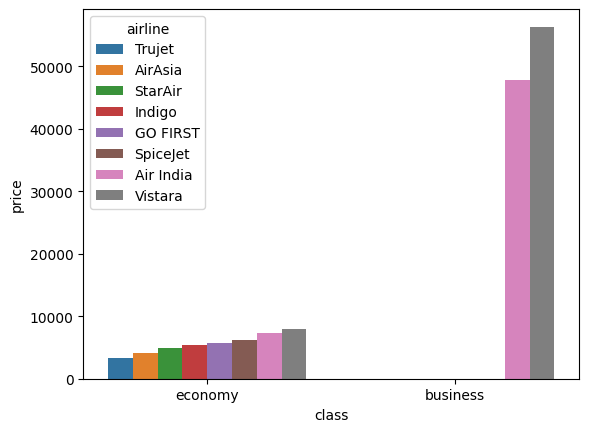

In [388]:
df2 = df.groupby(['airline',"class"]).agg({"price":'mean'}).reset_index().sort_values(by='price')

sns.barplot(x="class",y='price',data=df2, hue='airline')

In [389]:
# Label Encoding : we can encode the Flight_num, From, To, Stop, airlines

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df["airline"] = labelencoder.fit_transform(df["airline"])
df["flight_num"] = labelencoder.fit_transform(df["flight_num"])
df["from"]= labelencoder.fit_transform(df["from"])
df["to"]= labelencoder.fit_transform(df["to"])
df["stops"]= labelencoder.fit_transform(df["stops"])
df["class"]= labelencoder.fit_transform(df["class"])



In [390]:
df.head()

,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops,Year,Month,Day
0,4,1416,1,2,18:55,5,21:05,02h 10m,6013,39,2023,6,26
1,4,1395,1,2,06:20,5,08:40,02h 20m,6013,39,2023,6,26
2,1,1217,1,2,04:25,5,06:35,02h 10m,6016,39,2023,6,26
3,7,1567,1,2,10:20,5,12:35,02h 15m,6015,39,2023,6,26
4,7,1557,1,2,08:50,5,11:10,02h 20m,6015,39,2023,6,26


In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   airline     300261 non-null  int64 
 1   flight_num  300261 non-null  int64 
 2   class       300261 non-null  int64 
 3   from        300261 non-null  int64 
 4   dep_time    300261 non-null  object
 5   to          300261 non-null  int64 
 6   arr_time    300261 non-null  object
 7   duration    300261 non-null  object
 8   price       300261 non-null  int64 
 9   stops       300261 non-null  int64 
 10  Year        300261 non-null  int32 
 11  Month       300261 non-null  int32 
 12  Day         300261 non-null  int32 
dtypes: int32(3), int64(7), object(3)
memory usage: 26.3+ MB


In [392]:



# We need to change the dtype of arr_time duration and dep_time
df[["dep_Hours","dep_mins"]] = df["dep_time"].str.split(':',expand=True)
df[["arr_Hours","arr_mins"]] = df["arr_time"].str.split(':',expand=True)

In [393]:
df["dep_hours"]=df["dep_Hours"].astype('int')
df["dep_mins"]=df["dep_mins"].astype('int')
df["arr_hours"]=df["arr_Hours"].astype('int')
df["arr_mins"]=df["arr_mins"].astype('int')

In [394]:
df = df.drop("dep_time",axis=1)
df = df.drop("arr_time",axis=1)

In [395]:
df.head()

,airline,flight_num,class,from,to,duration,price,stops,Year,Month,Day,dep_Hours,dep_mins,arr_Hours,arr_mins,dep_hours,arr_hours
0,4,1416,1,2,5,02h 10m,6013,39,2023,6,26,18,55,21,5,18,21
1,4,1395,1,2,5,02h 20m,6013,39,2023,6,26,06,20,08,40,6,8
2,1,1217,1,2,5,02h 10m,6016,39,2023,6,26,04,25,06,35,4,6
3,7,1567,1,2,5,02h 15m,6015,39,2023,6,26,10,20,12,35,10,12
4,7,1557,1,2,5,02h 20m,6015,39,2023,6,26,08,50,11,10,8,11


In [396]:
def convert_duration(duration):
    try:
        # Handle decimal values
        if '.' in duration:
            hours, minutes = map(int, duration.split('.'))
            total_minutes = hours * 60 + minutes
            return total_minutes
        else:
            return int(duration.lstrip('0') or '0')  # Remove leading zeros
    except ValueError:
        return 0  # Handle any conversion errors

# Apply the conversion function
df['duration'] = df['duration'].apply(convert_duration)

# Convert the entire column to integers
df['duration'] = df['duration'].astype(int)

# Check the unique values after conversion
print(df['duration'].unique())

[0]


In [397]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   airline     300261 non-null  int64 
 1   flight_num  300261 non-null  int64 
 2   class       300261 non-null  int64 
 3   from        300261 non-null  int64 
 4   to          300261 non-null  int64 
 5   duration    300261 non-null  int64 
 6   price       300261 non-null  int64 
 7   stops       300261 non-null  int64 
 8   Year        300261 non-null  int32 
 9   Month       300261 non-null  int32 
 10  Day         300261 non-null  int32 
 11  dep_Hours   300261 non-null  object
 12  dep_mins    300261 non-null  int64 
 13  arr_Hours   300261 non-null  object
 14  arr_mins    300261 non-null  int64 
 15  dep_hours   300261 non-null  int64 
 16  arr_hours   300261 non-null  int64 
dtypes: int32(3), int64(12), object(2)
memory usage: 35.5+ MB


In [398]:
df = df.drop('dep_Hours',axis=1)
df = df.drop('arr_Hours',axis=1)

In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   airline     300261 non-null  int64
 1   flight_num  300261 non-null  int64
 2   class       300261 non-null  int64
 3   from        300261 non-null  int64
 4   to          300261 non-null  int64
 5   duration    300261 non-null  int64
 6   price       300261 non-null  int64
 7   stops       300261 non-null  int64
 8   Year        300261 non-null  int32
 9   Month       300261 non-null  int32
 10  Day         300261 non-null  int32
 11  dep_mins    300261 non-null  int64
 12  arr_mins    300261 non-null  int64
 13  dep_hours   300261 non-null  int64
 14  arr_hours   300261 non-null  int64
dtypes: int32(3), int64(12)
memory usage: 30.9 MB


In [400]:
df

,airline,flight_num,class,from,to,duration,price,stops,Year,Month,Day,dep_mins,arr_mins,dep_hours,arr_hours
0,4,1416,1,2,5,0,6013,39,2023,6,26,55,5,18,21
1,4,1395,1,2,5,0,6013,39,2023,6,26,20,40,6,8
2,1,1217,1,2,5,0,6016,39,2023,6,26,25,35,4,6
3,7,1567,1,2,5,0,6015,39,2023,6,26,20,35,10,12
4,7,1557,1,2,5,0,6015,39,2023,6,26,50,10,8,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,7,1485,0,1,3,0,70304,0,2023,8,13,45,50,9,19
300257,7,1489,0,1,3,0,78262,0,2023,8,13,30,55,12,22
300258,7,1494,0,1,3,0,80285,0,2023,8,13,5,55,7,20
300259,7,1491,0,1,3,0,82809,0,2023,8,13,0,0,7,17


# Machine Learning predictions

In [401]:
df.head()

,airline,flight_num,class,from,to,duration,price,stops,Year,Month,Day,dep_mins,arr_mins,dep_hours,arr_hours
0,4,1416,1,2,5,0,6013,39,2023,6,26,55,5,18,21
1,4,1395,1,2,5,0,6013,39,2023,6,26,20,40,6,8
2,1,1217,1,2,5,0,6016,39,2023,6,26,25,35,4,6
3,7,1567,1,2,5,0,6015,39,2023,6,26,20,35,10,12
4,7,1557,1,2,5,0,6015,39,2023,6,26,50,10,8,11


In [402]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [403]:
X = df.drop(columns="price")
y = df["price"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [404]:
models = {"Linear Regression":LinearRegression(),
          "Random Forest Regressor: ": RandomForestRegressor(),
          "Decision Tree Regressor: ": DecisionTreeRegressor(),
          "XGBoost Regression: ": XGBRegressor()}

In [405]:
r2_scores=[]
mean_squared=[]
mean_absolute=[]
model_list = []
for model_name,model in models.items():
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  r2_scores.append(r2_score(y_test,y_pred))
  mean_squared.append(mean_squared_error(y_test,y_pred))
  mean_absolute.append(mean_absolute_error(y_test,y_pred))
  model_list.append(model_name)

In [406]:
accuracy_data = pd.DataFrame()
accuracy_data['Model ']=model_list
accuracy_data['R2 Score']=r2_scores

accuracy_data

,Model,R2 Score
0,Linear Regression,0.901329
1,Random Forest Regressor:,0.989788
2,Decision Tree Regressor:,0.983301
3,XGBoost Regression:,0.983510
